In [44]:
import pandas as pd

data = pd.read_csv('Iris-dataset.csv')
data.head()
y = data.pop('class')
print(y.shape)
print(y)

(150,)
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object


In [45]:
y_transormed = y.copy()
y_transormed = y_transormed.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
print(y_transormed.shape)


(150,)


In [46]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y = encode.fit_transform(y)
print(y.shape)

(150,)


In [47]:
data.isnull().sum()

sepal_length    4
sepal_width     1
petal_length    3
petal_width     4
dtype: int64

In [48]:
data.T.isnull().any().sum()

11

In [49]:
from sklearn.impute import KNNImputer

mean = KNNImputer(n_neighbors=3)
X=mean.fit_transform(data)
#X was converted to an array from Datafram by fitting
print(X.shape)

(150, 4)


In [50]:
import numpy as np
N,p = np.shape(data)
classes = np.unique(y)
print("This dataset contains {} samples and {} features".format(N,p))
print("This target value contains {} classes".format(classes))
print("This target value contains {} classes".format(len(classes)))

This dataset contains 150 samples and 4 features
This target value contains [0 1 2] classes
This target value contains 3 classes


In [51]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.00000,149.000000,147.000000,146.000000
mean,5.84726,3.059732,3.804762,1.197260
std,0.83213,0.429317,1.752155,0.756849
min,4.30000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.600000,0.300000
50%,5.80000,3.000000,4.400000,1.300000
75%,6.40000,3.300000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


(150,)


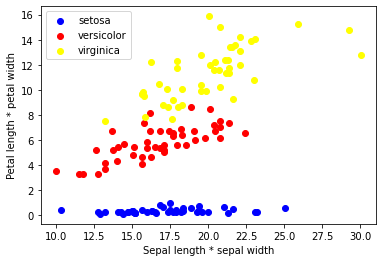

In [52]:
import matplotlib.pyplot as plt
sepal_area=data['sepal_length'] * data['sepal_width']
petal_area=data['petal_length'] * data['petal_width']
print(sepal_area.shape)
fig,ax = plt.subplots()
ax.scatter(sepal_area.loc[y==0],petal_area.loc[y==0], label='setosa',color='blue')
ax.scatter(sepal_area.loc[y==1],petal_area.loc[y==1], label='versicolor',color='red')
ax.scatter(sepal_area.loc[y==2],petal_area.loc[y==2], label='virginica',color='yellow')
ax.set_xlabel('Sepal length * sepal width')
ax.set_ylabel('Petal length * petal width')
ax.legend()
plt.show()